<a href="https://colab.research.google.com/github/salianbharat/Deep/blob/main/Lung_cancer_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning assignment for Lung Cancer Dataset**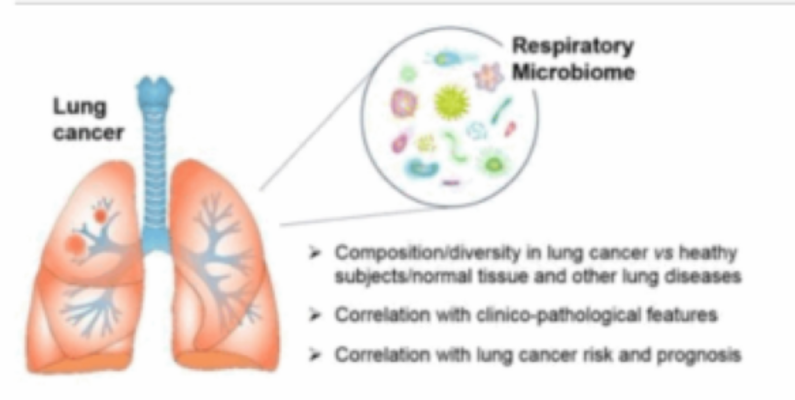

In [27]:
# Importing required libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from tensorflow.keras.models import Sequential  # For building the neural network model
from tensorflow.keras.layers import Dense  # For adding layers to the model

In [28]:
lc = pd.read_csv("/content/drive/MyDrive/Dataset/Deep Learning Assignments/survey lung cancer.csv")

In [29]:
lc.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [30]:
lc.shape

(309, 16)

In [6]:
if lc.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [31]:
# Check for missing values
print("Missing values in each column:")
print(lc.isnull().sum())

# Get summary statistics of the dataset
print("Summary statistics of the dataset:")
print(lc.describe())

# Check the data types of each column
print("Data types of each column:")
print(lc.dtypes)

# Display the unique values for the categorical columns
print("Unique values in categorical columns:")
print("GENDER:", lc['GENDER'].unique())
print("LUNG_CANCER:", lc['LUNG_CANCER'].unique())


Missing values in each column:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64
Summary statistics of the dataset:
              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000    

# Dataset Overview
**Number of entries:** 309
**Number of columns:** 16
**Columns and Data Types:**
**GENDER (object):** Categorical, represents the gender of the individuals.
**AGE (int64):** Numerical, represents the age of the individuals.
**SMOKING to CHEST PAIN (int64)**: Categorical, binary features indicating the presence (2) or absence (1) of various conditions.
**LUNG_CANCER (object):** Categorical, the target variable indicating the presence of lung cancer.


# Steps Forward

**Data Exploration:**

*   Visualize distributions of numerical features.
*   Analyze the relationship between features and the target variable.
*   Explore correlations between features.


**Preprocessing and Feature Engineering:**



*  Standardise the varibale
*  Encode categorical variables.
*  Standardize/normalize numerical features.



Checking Unique values for Categorical variable GENDER and LUNG_CANCER

# Preprocessing and Feature Engineering

**Encoding Categorical Variables**

In [33]:
# Check the unique values for each column in the dataset
unique_values = lc.nunique()
print("Unique values in each column:")
print(unique_values)

# Display unique values for each column
for column in lc.columns:
    print(f"Unique values in {column}: {lc[column].unique()}")


Unique values in each column:
GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64
Unique values in GENDER: [2 1]
Unique values in AGE: [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
Unique values in SMOKING: [1 2]
Unique values in YELLOW_FINGERS: [2 1]
Unique values in ANXIETY: [2 1]
Unique values in PEER_PRESSURE: [1 2]
Unique values in CHRONIC DISEASE: [1 2]
Unique values in FATIGUE : [2 1]
Unique values in ALLERGY : [1 2]
Unique values in WHEEZING: [2 1]
Unique values in ALCOHOL CONSUMING: [2 1]
Unique values 

In [34]:
# Verify the encoding (if required)
# Encode 'GENDER' column
label_encoder_gender = LabelEncoder()
lc['GENDER'] = label_encoder_gender.fit_transform(lc['GENDER']) + 1

# Encode 'LUNG_CANCER' column
label_encoder_lung_cancer = LabelEncoder()
lc['LUNG_CANCER'] = label_encoder_lung_cancer.fit_transform(lc['LUNG_CANCER']) + 1

# Verify the encoding
print("Encoded 'GENDER' column:")
print(lc['GENDER'].unique())
print("Encoded 'LUNG_CANCER' column:")
print(lc['LUNG_CANCER'].unique())


Encoded 'GENDER' column:
[2 1]
Encoded 'LUNG_CANCER' column:
[2 1]


In [35]:
# Separate features and target variable
X = lc.drop('LUNG_CANCER', axis=1)
y = lc['LUNG_CANCER']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for easier manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Verify the scaling
print("First few rows of the standardized features:")
print(X_scaled_df.head())


First few rows of the standardized features:
     GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
0  0.952579  0.771850 -1.135292        0.869300  1.003241      -1.003241   
1  0.952579  1.381829  0.880830       -1.150351 -0.996769      -1.003241   
2 -1.049781 -0.448107 -1.135292       -1.150351 -0.996769       0.996769   
3  0.952579  0.039876  0.880830        0.869300  1.003241      -1.003241   
4 -1.049781  0.039876 -1.135292        0.869300 -0.996769      -1.003241   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0        -1.009756  0.696833 -1.120480  0.892475           0.892475  0.852207   
1         0.990338  0.696833  0.892475 -1.120480          -1.120480 -1.173424   
2        -1.009756  0.696833 -1.120480  0.892475          -1.120480  0.852207   
3        -1.009756 -1.435063 -1.120480 -1.120480           0.892475 -1.173424   
4        -1.009756 -1.435063 -1.120480  0.892475          -1.120480  0.852207   

   SHORTNES